In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('healthcare_dataset.csv')

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### DATA PREPROCESSING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

    колонку с номером палаты сразу дропнем, тк на результат выздоровления она никак не будет влиять

In [6]:
data = data.drop('Room Number', axis=1)

### Data types conversion

    сначала с датами в datetime

In [7]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

### Categorical features

In [8]:
data.select_dtypes(include='object').columns.to_list()

['Name',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

    посмотрим на количество уникальных значений в названии госпителей и имен врачей

In [9]:
len(data['Doctor'].unique()), len(data['Hospital'].unique())

(40341, 39876)

In [10]:
data.groupby('Hospital')['Test Results'].nunique()

Hospital
Abbott Inc                       1
Abbott Ltd                       1
Abbott Moore and Williams,       1
Abbott and Thompson, Sullivan    1
Abbott, Peters and Hoffman       1
                                ..
and Zimmerman Sons               1
and Zuniga Davis Carlson,        1
and Zuniga Francis Peterson,     1
and Zuniga Sons                  1
and Zuniga Thompson, Blake       1
Name: Test Results, Length: 39876, dtype: int64

In [11]:
data.groupby('Doctor')['Test Results'].nunique()

Doctor
Aaron Acevedo      1
Aaron Adams        1
Aaron Aguilar      1
Aaron Alexander    1
Aaron Anderson     1
                  ..
Zoe Khan           1
Zoe Knight         1
Zoe Nichols        1
Zoe Roberts        1
Zoe Wallace        1
Name: Test Results, Length: 40341, dtype: int64

    как врачи так и госпитали не имеют примерно по одному уникальному значению, поэтому не вносят вклад, можем дропнуть(если бы у нас была информация о профессии врача или например местонахождении больниц, то можно было например сгруппировать по странам,чтобы понять,где чаще всего лечатся и где лучше результаты в медицине)

In [12]:
data = data.drop(['Name', 'Hospital', 'Doctor'], axis=1)

    начнем кодировать наши данные

In [13]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
data['Gender'] = data['Gender'].map({
    'Male': 0,
    'Female': 1
})

In [15]:
cat_features = data.select_dtypes(include='object').columns.to_list()

In [16]:
for el in list(cat_features):
    print(f"'{el}' column's unique values:\n {data[el].unique()}\n")

'Blood Type' column's unique values:
 ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

'Medical Condition' column's unique values:
 ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

'Insurance Provider' column's unique values:
 ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

'Admission Type' column's unique values:
 ['Urgent' 'Emergency' 'Elective']

'Medication' column's unique values:
 ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

'Test Results' column's unique values:
 ['Normal' 'Inconclusive' 'Abnormal']



    так как у нас в каждом признаке меньше 10 категорий, то используем one hot encoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_df = one_hot_encoder.fit_transform(data[cat_features])

data_encoded = pd.DataFrame(one_hot_df, columns=one_hot_encoder.get_feature_names_out(cat_features))
data_encoded = pd.concat([data, data_encoded], axis=1)
data_encoded = data_encoded.drop(cat_features, axis=1)

In [19]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Age                                  55500 non-null  int64         
 1   Gender                               55500 non-null  int64         
 2   Date of Admission                    55500 non-null  datetime64[ns]
 3   Billing Amount                       55500 non-null  float64       
 4   Discharge Date                       55500 non-null  datetime64[ns]
 5   Blood Type_A+                        55500 non-null  float64       
 6   Blood Type_A-                        55500 non-null  float64       
 7   Blood Type_AB+                       55500 non-null  float64       
 8   Blood Type_AB-                       55500 non-null  float64       
 9   Blood Type_B+                        55500 non-null  float64       
 10  Blood Type

### Datatime new feature

    добавим новый признак продолжительсноть лечение, чтобы можно было оценить как тяжесть болезни по продолжительности влияет на результат

In [20]:
data_encoded.head()

,Age,Gender,Date of Admission,Billing Amount,Discharge Date,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,30,0,2024-01-31,18856.281306,2024-02-02,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,62,0,2019-08-20,33643.327287,2019-08-26,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,76,1,2022-09-22,27955.096079,2022-10-07,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28,1,2020-11-18,37909.782410,2020-12-18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,43,1,2022-09-19,14238.317814,2022-10-09,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
data_encoded['Days in Hospital'] = (data_encoded['Discharge Date'] - data_encoded['Date of Admission']).dt.days

### Outliers

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

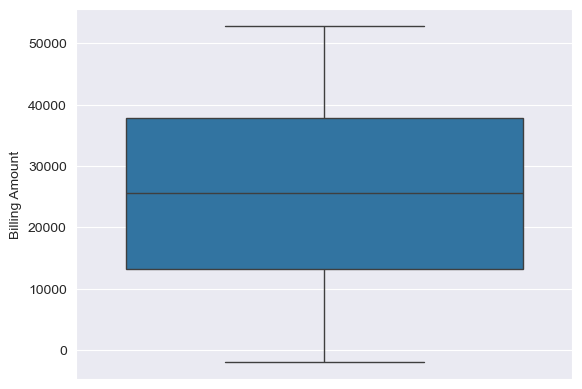

In [52]:
sns.boxplot(data_encoded['Billing Amount']);

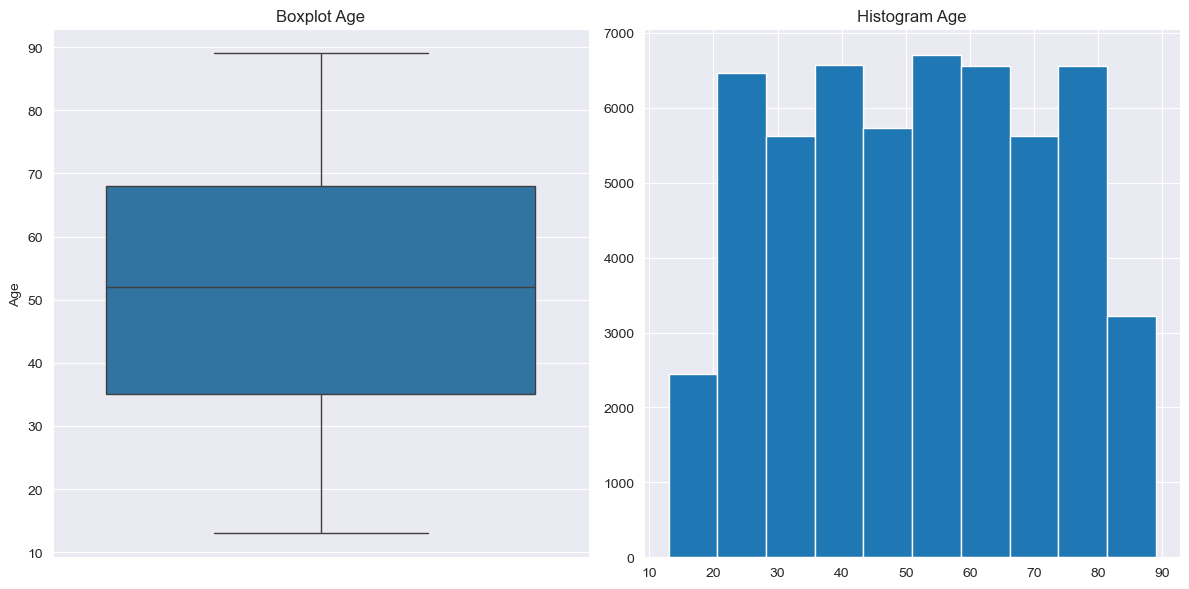

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data_encoded['Age'], ax=axes[0])
axes[0].set_title('Boxplot Age')

data['Age'].hist(ax=axes[1])
axes[1].set_title('Histogram Age')

plt.tight_layout()
plt.show()